<a href="https://colab.research.google.com/github/Keetawin/Multiclass_LogisticRegression_Ridge_FromScratch/blob/main/Multiclass_Logistic_Regression_and_SGD_Implementation_with_Ridge_Regularization_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_csv_url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"

df = pd.read_csv(raw_csv_url)

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Prepare the data in one-against-the-rest strategy.
This can be done by converting the "Species" column into 3 binary columns.

In [ ]:
dummy_species = pd.get_dummies(df, prefix='species')

dummy_species

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
X = dummy_species.drop(columns=['species_setosa', 'species_versicolor','species_virginica'])
y = dummy_species.iloc[:,4:]

In [ ]:
X['constant'] = 1

In [ ]:
theta = np.ones(X.shape[1])

# Formulate the error function of the logistic regression with ridge regularization criterion.

\begin{equation}
L(w) = -\frac{1}{N}\sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] + \frac{2\lambda}{N} \sum_{j=1}^{n} w_j^2
\end{equation}


In [ ]:
def hypothesis(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001

def cost(X, y, theta, lambda_reg):
    y1 = hypothesis(X, theta)

    # Add a small constant to avoid taking the logarithm of zero or negative values
    epsilon = 1e-10
    y1 = np.clip(y1, epsilon, 1 - epsilon)

    # Calculate the cost without regularization
    cost_without_reg = -(1/len(X)) * np.sum(y * np.log(y1) + (1-y) * np.log(1-y1))

    # Calculate the regularization term
    regularization_term = (lambda_reg / (2 * len(X))) * np.sum(theta[1:]**2)  # Exclude theta0

    # Add the regularization term to the cost
    cost_with_reg = cost_without_reg + regularization_term

    return cost_with_reg



# Derive the gradient of the error function by deriving the partial  derivative of the error function in Task 2

\begin{align*}
\text{Step 1:} &\quad L(w) = -\frac{1}{N}\sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] + \frac{2\lambda}{N} \sum_{j=1}^{n} w_j^2 \\
\text{Step 2:} &\quad \frac{\partial}{\partial w_j} \left(-\frac{1}{N}\sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]\right) \\
\text{Step 3:} &\quad -\frac{1}{N}\sum_{i=1}^{N} \frac{\partial}{\partial w_j} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] \\
\text{Step 4:} &\quad -\frac{1}{N}\sum_{i=1}^{N} \left[y_i \frac{1}{\hat{y}_i} \frac{\partial \hat{y}_i}{\partial w_j} - (1 - y_i) \frac{1}{1 - \hat{y}_i} \frac{\partial \hat{y}_i}{\partial w_j}\right] \\
\text{Step 5:} &\quad \frac{\partial L}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^{N} \left[y_i \left(\frac{1}{\hat{y}_i}\frac{\partial \hat{y}_i}{\partial w_j}\right) - (1 - y_i)\left(\frac{1}{1 - \hat{y}_i}\frac{\partial \hat{y}_i}{\partial w_j}\right)\right] + \frac{4\lambda}{N} w_j \\
\text{Step 6:} &\quad \frac{\partial L}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^{N} \left[\frac{y_i}{\hat{y}_i} \frac{\partial \hat{y}_i}{\partial w_j} - \frac{1 - y_i}{1 - \hat{y}_i} \frac{\partial \hat{y}_i}{\partial w_j}\right] + \frac{4\lambda}{N} w_j \\
\text{Step 7:} &\quad \frac{\partial L}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^{N} \left[\frac{y_i - y_i \hat{y}_i - \hat{y}_i + y_i \hat{y}_i}{\hat{y}_i(1 - \hat{y}_i)} \frac{\partial \hat{y}_i}{\partial w_j}\right] + \frac{4\lambda}{N} w_j \\
\text{Step 8:} &\quad \frac{\partial L}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^{N} \left[\frac{y_i - \hat{y}_i}{\hat{y}_i(1 - \hat{y}_i)} \frac{\partial \hat{y}_i}{\partial w_j}\right] + \frac{4\lambda}{N} w_j \\
\text{Step 9:} &\quad \frac{\partial L}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^{N} \left[\frac{y_i - \hat{y}_i}{\hat{y}_i(1 - \hat{y}_i)}\right] \frac{\partial \hat{y}_i}{\partial w_j} + \frac{4\lambda}{N} w_j \\
\text{Step 10:} &\quad \frac{\partial L}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^{N} \left[\frac{y_i}{\hat{y}_i} - 1\right] \frac{\partial \hat{y}_i}{\partial w_j} + \frac{4\lambda}{N} w_j \\
\text{Step 11:} &\quad \frac{\partial L}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^{N} \left[\frac{y_i}{\hat{y}_i} - 1\right] x_{ij} + \frac{4\lambda}{N} w_j \\
\text{Step 12:} &\quad \frac{\partial L}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^{N} \left[\frac{y_i - \hat{y}_i}{\hat{y}_i} \right] x_{ij} + \frac{4\lambda}{N} w_j \\
\text{Step 13:} &\quad \frac{\partial L}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^{N} \left[y_i - \hat{y}_i \right] x_{ij} + \frac{4\lambda}{N} w_j \\
\end{align*}



In [ ]:
def gradient(X, y, theta, lambda_reg):
    m = len(X)
    h = hypothesis(X, theta)

    # Compute the gradient without regularization
    grad = (1/m) * np.dot(X.T, (h - y))

    # Compute the regularization term gradient (excluding theta0)
    reg_term = (4 * lambda_reg / m) * theta[1:]

    # Add the regularization term to the gradient
    grad[1:] += reg_term

    return grad


# Implement the gradient descent using all of the dataset in each iteration. (Use equation from Task 3)

In [ ]:
theta = pd.DataFrame(theta)

In [ ]:
def gradient_descent(X, y, theta, alpha, epochs, lambda_reg):
    m = len(X)
    num_labels = y.shape[1]  # Number of label columns
    loss_history = []

    for i in range(0, epochs):
        for j in range(0, num_labels):
            theta = pd.DataFrame(theta)
            h = hypothesis(X, theta.iloc[:, j])

            # Calculate the gradient using the gradient function
            grad = gradient(X, y.iloc[:, j], theta.iloc[:, j], lambda_reg)

            # Update theta for the current label column
            theta.iloc[:, j] -= alpha * grad

            c = cost(X, y.iloc[:, j], theta.iloc[:, j], lambda_reg)
            sum = 0
            sum += c

        c = sum / num_labels
        loss_history.append(c)
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {c}")

    return theta, loss_history


In [ ]:
theta = np.zeros([X.shape[1], y.shape[1]])
theta = gradient_descent(X, y, theta, 0.1, 1000, 1)

Epoch 0, Loss: 0.2180033188009083
Epoch 100, Loss: 0.10240223270491616
Epoch 200, Loss: 0.09074505831927099
Epoch 300, Loss: 0.08572562125489473
Epoch 400, Loss: 0.08307590728805621
Epoch 500, Loss: 0.08154651987685792
Epoch 600, Loss: 0.08061650432316676
Epoch 700, Loss: 0.08003059078943546
Epoch 800, Loss: 0.0796514628668663
Epoch 900, Loss: 0.07940069455981542


# Implement the stochastic gradient descent using the subset of dataset in each iteration. (Use equation from Task 3)

In [ ]:
import random

def sgd_gradient_descent(X, y, theta, alpha, epochs, lambda_reg):
    m = len(X)
    num_labels = y.shape[1]  # Number of label columns
    loss_history = []

    for i in range(0, epochs):
        random_index = random.randint(0, X.shape[0] - 1)
        sample_x = X.iloc[random_index].values
        sample_y = y.iloc[random_index].values
        for j in range(0, num_labels):
            h = hypothesis(sample_x, theta[:, j])

            # Compute the gradient without regularization
            grad = (1/m) * np.dot(sample_x.T, (h - sample_y[j]))

            # Compute the regularization term gradient (excluding theta0)
            reg_term = (4 * lambda_reg / m) * theta[1:, j]

            # Add the regularization term to the gradient
            grad[1:] += reg_term

            # Update theta for the current label column
            theta[:, j] -= alpha * grad

            c = cost(X, y.iloc[:, j], theta[:, j], lambda_reg)
            sum = 0
            sum += c

        c = sum / num_labels
        loss_history.append(c)

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {c}")

    return theta, loss_history


In [ ]:
theta = np.zeros([X.shape[1], y.shape[1]])
theta = sgd_gradient_descent(X, y, theta, 0.1, 1000, 0.05)

Epoch 0, Loss: 0.2303257475786876
Epoch 100, Loss: 0.21923596347829818
Epoch 200, Loss: 0.21488867233187947
Epoch 300, Loss: 0.21005431749126843
Epoch 400, Loss: 0.20728776120551237
Epoch 500, Loss: 0.20259520454256966
Epoch 600, Loss: 0.19959851315365437
Epoch 700, Loss: 0.19734408736213258
Epoch 800, Loss: 0.19122561380705638
Epoch 900, Loss: 0.18814024993501385


# Test to see the effect of λ on the training process.


In [ ]:
# Training with lambda = 0.01
theta_1 = np.zeros([X.shape[1], y.shape[1]])
theta_1, loss_history_1 = gradient_descent(X, y, theta_1, 0.1, 1000, 0.01)


Epoch 0, Loss: 0.21799978434724399
Epoch 100, Loss: 0.0951582460216973
Epoch 200, Loss: 0.0774006917258802
Epoch 300, Loss: 0.0673423722089127
Epoch 400, Loss: 0.0605856112127602
Epoch 500, Loss: 0.05568230163955056
Epoch 600, Loss: 0.05194533785891592
Epoch 700, Loss: 0.04899485788256954
Epoch 800, Loss: 0.046601385687641945
Epoch 900, Loss: 0.044617516144778796


In [ ]:
# Training with lambda = 0.1
theta_2 = np.zeros([X.shape[1], y.shape[1]])
theta_2, loss_history_2 = gradient_descent(X, y, theta_2, 0.1, 1000, 0.1)


Epoch 0, Loss: 0.2180001056612135
Epoch 100, Loss: 0.09587765009333632
Epoch 200, Loss: 0.07883506754093637
Epoch 300, Loss: 0.0694425296109895
Epoch 400, Loss: 0.06328570467144047
Epoch 500, Loss: 0.05892254608092493
Epoch 600, Loss: 0.055675502950914536
Epoch 700, Loss: 0.05317311513882244
Epoch 800, Loss: 0.0511925725502533
Epoch 900, Loss: 0.049591669263061154


In [ ]:
# Training with lambda = 1
theta_3 = np.zeros([X.shape[1], y.shape[1]])
theta_3, loss_history_3 = gradient_descent(X, y, theta_3, 0.1, 1000, 1)


Epoch 0, Loss: 0.2180033188009083
Epoch 100, Loss: 0.10240223270491616
Epoch 200, Loss: 0.09074505831927099
Epoch 300, Loss: 0.08572562125489473
Epoch 400, Loss: 0.08307590728805621
Epoch 500, Loss: 0.08154651987685792
Epoch 600, Loss: 0.08061650432316676
Epoch 700, Loss: 0.08003059078943546
Epoch 800, Loss: 0.0796514628668663
Epoch 900, Loss: 0.07940069455981542


In [ ]:
# Training with lambda = 10
theta_4 = np.zeros([X.shape[1], y.shape[1]])
theta_4, loss_history_4 = gradient_descent(X, y, theta_4, 0.1, 1000, 10)


Epoch 0, Loss: 0.21803545019785683
Epoch 100, Loss: 0.13786595040231636
Epoch 200, Loss: 0.1367644673393193
Epoch 300, Loss: 0.13661301565828748
Epoch 400, Loss: 0.1365868354008423
Epoch 500, Loss: 0.13658219289875503
Epoch 600, Loss: 0.13658136558823394
Epoch 700, Loss: 0.13658121796085085
Epoch 800, Loss: 0.13658119160695356
Epoch 900, Loss: 0.13658118690172097


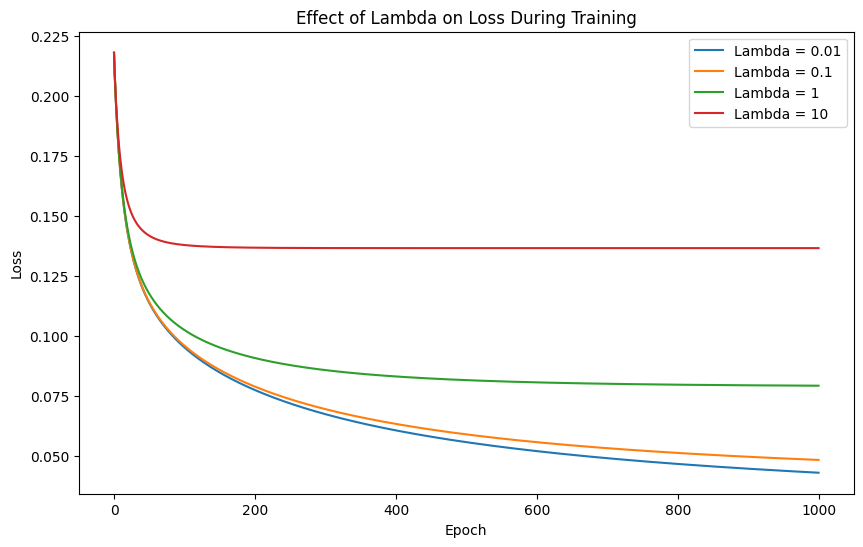

In [ ]:
# Plot the loss history for both cases
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(loss_history_1)), y=loss_history_1, label='Lambda = 0.01')
sns.lineplot(x=range(len(loss_history_2)), y=loss_history_2, label='Lambda = 0.1')
sns.lineplot(x=range(len(loss_history_3)), y=loss_history_3, label='Lambda = 1')
sns.lineplot(x=range(len(loss_history_4)), y=loss_history_4, label='Lambda = 10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Effect of Lambda on Loss During Training')
plt.legend()
plt.show()


# Test to see the effect of sampling proportion in Task 5

In [ ]:
theta_1 = np.zeros([X.shape[1], y.shape[1]])
theta_1, loss_history_1 = gradient_descent(X, y, theta_1, 0.1, 1000, 0.01)

Epoch 0, Loss: 0.21799978434724399
Epoch 100, Loss: 0.0951582460216973
Epoch 200, Loss: 0.0774006917258802
Epoch 300, Loss: 0.0673423722089127
Epoch 400, Loss: 0.0605856112127602
Epoch 500, Loss: 0.05568230163955056
Epoch 600, Loss: 0.05194533785891592
Epoch 700, Loss: 0.04899485788256954
Epoch 800, Loss: 0.046601385687641945
Epoch 900, Loss: 0.044617516144778796


In [ ]:
theta_2 = np.zeros([X.shape[1], y.shape[1]])
theta_2, loss_history_2 = sgd_gradient_descent(X, y, theta_2, 0.1, 1000, 0.01)

Epoch 0, Loss: 0.23037754595183865
Epoch 100, Loss: 0.21969495215012114
Epoch 200, Loss: 0.21541726639728973
Epoch 300, Loss: 0.21032563718617156
Epoch 400, Loss: 0.20457122665590197
Epoch 500, Loss: 0.19962256466826556
Epoch 600, Loss: 0.19572347622475053
Epoch 700, Loss: 0.19253924798091748
Epoch 800, Loss: 0.18844527468578012
Epoch 900, Loss: 0.1861454236374742


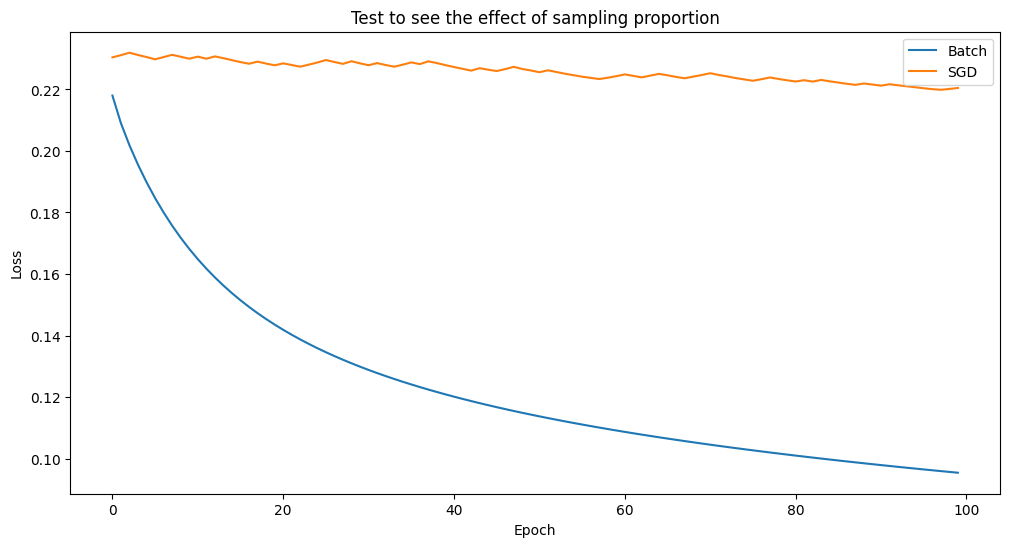

In [ ]:
# Plot the loss history for both cases
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(loss_history_1)), y=loss_history_1, label='Batch')
sns.lineplot(x=range(len(loss_history_2)), y=loss_history_2, label='SGD')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test to see the effect of sampling proportion')
plt.legend()
plt.show()
